In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/minion_1016_sqlite.db')
outDir = 'astrometry_dcr'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

slicer = slicers.UserPointsSlicer(1.985364, -1.064323)
metric = metrics.PassMetric()
sql = 'fieldID = 335 and (filter = "r" or filter = "g" or filter = "i" or filter = "z")'
stackerList = []
stackerList.append(stackers.ParallaxFactorStacker())
stackerList.append(stackers.DcrStacker())
bundle = metricBundles.MetricBundle(metric, slicer, sql, stackerList=stackerList)
bundleList.append(bundle)

bundleList.append(metricBundles.MetricBundle(metrics.ParallaxDcrDegenMetric(), slicer, sql, stackerList=stackerList))

bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint fieldID = 335 and (filter = "r" or filter = "g" or filter = "i" or filter = "z")
Found 680 visits
Running:  ['opsim_Pass_fieldID_335_and_r_or_g_or_i_or_z_USER', 'opsim_ParallaxDcrDegenMetric_fieldID_335_and_r_or_g_or_i_or_z_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:479: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth


Plotting figures with fieldID = 335 and (filter = "r" or filter = "g" or filter = "i" or filter = "z") sqlconstraint now.
Plotting complete.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:66: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn('Optimal bin calculation calculated NaN: returning %i' %(nbinMax))
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:350: UserWarning: Only one metric value, making a guess at a good histogram range.
  warnings.warn('Only one metric value, making a guess at a good histogram range.')


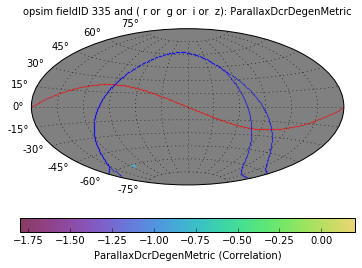

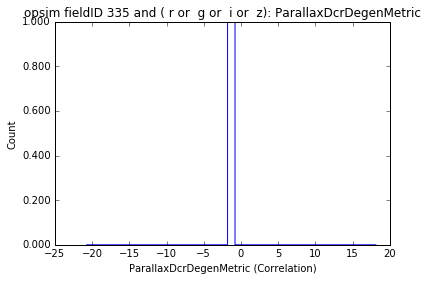

In [4]:
bgroup.plotAll(closefigs=False)

In [5]:
print 'Parallax-DCR amplitude correlation', bundleList[1].metricValues

Parallax-DCR amplitude correlation [-0.7982174736706519]


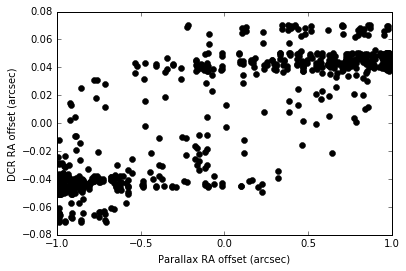

In [6]:
plt.plot(bundle.metricValues[0]['ra_pi_amp'], bundle.metricValues[0]['ra_dcr_amp'], 'ko')
plt.xlabel('Parallax RA offset (arcsec)')
plt.ylabel('DCR RA offset (arcsec)')

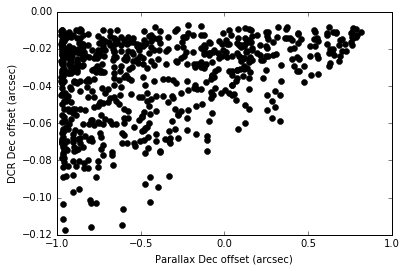

In [7]:
plt.plot(bundle.metricValues[0]['dec_pi_amp'], bundle.metricValues[0]['dec_dcr_amp'], 'ko')
plt.xlabel('Parallax Dec offset (arcsec)')
plt.ylabel('DCR Dec offset (arcsec)')

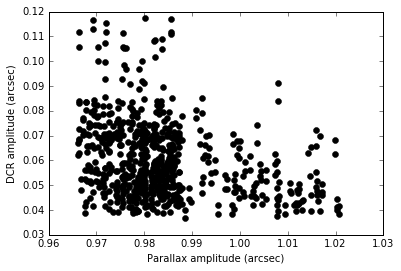

In [8]:
pi_r = (bundle.metricValues[0]['ra_pi_amp']**2 + bundle.metricValues[0]['dec_pi_amp']**2)**0.5
dcr_r = (bundle.metricValues[0]['ra_dcr_amp']**2 + bundle.metricValues[0]['dec_dcr_amp']**2)**0.5
plt.plot(pi_r, dcr_r, 'ko')
plt.xlabel('Parallax amplitude (arcsec)')
plt.ylabel('DCR amplitude (arcsec)')

Querying database with constraint fieldID = 836 and (filter = "r" or filter = "g" or filter = "i" or filter = "z")
Found 660 visits
Running:  ['opsim_Pass_fieldID_836_and_r_or_g_or_i_or_z_USER', 'opsim_ParallaxDcrDegenMetric_fieldID_836_and_r_or_g_or_i_or_z_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with fieldID = 836 and (filter = "r" or filter = "g" or filter = "i" or filter = "z") sqlconstraint now.
Plotting complete.
Parallax-DCR amplitude correlation [-0.45312623877715863]


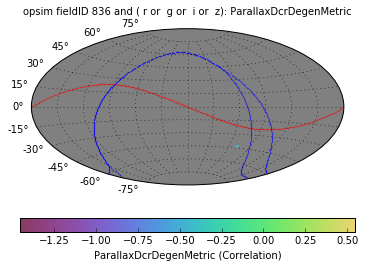

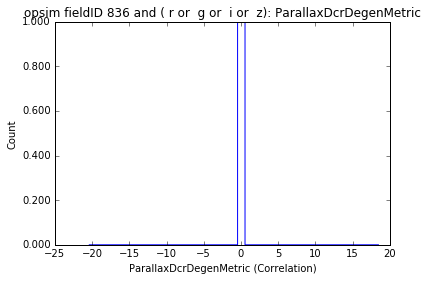

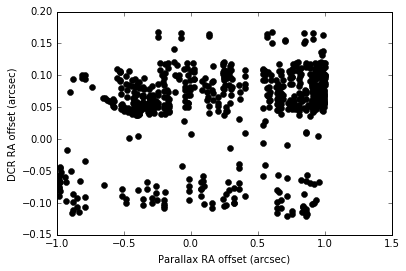

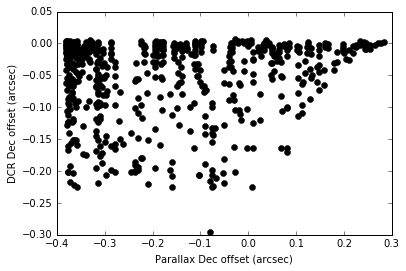

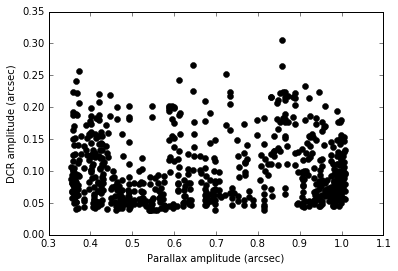

In [9]:
# And now for one that shouldn't look as bad
bundleList = []

slicer = slicers.UserPointsSlicer(5.060636, -0.746802)
metric = metrics.PassMetric()
sql = 'fieldID = 836 and (filter = "r" or filter = "g" or filter = "i" or filter = "z")'
stackerList = []
stackerList.append(stackers.ParallaxFactorStacker())
stackerList.append(stackers.DcrStacker())
bundle = metricBundles.MetricBundle(metric, slicer, sql, stackerList=stackerList)
bundleList.append(bundle)

bundleList.append(metricBundles.MetricBundle(metrics.ParallaxDcrDegenMetric(), slicer, sql, stackerList=stackerList))

bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)
print 'Parallax-DCR amplitude correlation', bundleList[1].metricValues
plt.figure()
plt.plot(bundle.metricValues[0]['ra_pi_amp'], bundle.metricValues[0]['ra_dcr_amp'], 'ko')
plt.xlabel('Parallax RA offset (arcsec)')
plt.ylabel('DCR RA offset (arcsec)')
plt.figure()
plt.plot(bundle.metricValues[0]['dec_pi_amp'], bundle.metricValues[0]['dec_dcr_amp'], 'ko')
plt.xlabel('Parallax Dec offset (arcsec)')
plt.ylabel('DCR Dec offset (arcsec)')
plt.figure()
pi_r = (bundle.metricValues[0]['ra_pi_amp']**2 + bundle.metricValues[0]['dec_pi_amp']**2)**0.5
dcr_r = (bundle.metricValues[0]['ra_dcr_amp']**2 + bundle.metricValues[0]['dec_dcr_amp']**2)**0.5
plt.plot(pi_r, dcr_r, 'ko')
plt.xlabel('Parallax amplitude (arcsec)')
plt.ylabel('DCR amplitude (arcsec)')


Querying database with constraint filter = "r" or filter = "g" or filter = "i" or filter = "z"
Found 1820274 visits
Running:  ['opsim_ParallaxDcrDegenMetric_r_or_g_or_i_or_z_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" or filter = "g" or filter = "i" or filter = "z" sqlconstraint now.
Plotting complete.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:65: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


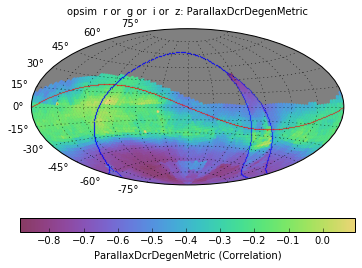

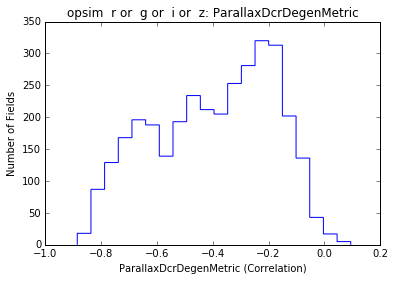

In [10]:
bundleList = []
slicer = slicers.OpsimFieldSlicer()
sql = 'filter = "r" or filter = "g" or filter = "i" or filter = "z"'
bundleList.append(metricBundles.MetricBundle(metrics.ParallaxDcrDegenMetric(), slicer, sql, stackerList=stackerList))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)